# Classification Model Evaluation

In [60]:
!pip install matplotlib

You should consider upgrading via the 'c:\program files\python36\python.exe -m pip install --upgrade pip' command.


In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

## Model Selection Process

### Data Cleaning and Preparation

In [7]:
# Read data
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
# Dimensions of the data set
print(diabetes.shape)

(768, 9)


In [9]:
# Remove unusual rows of data
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

# Dimensions of data set after cleansing
print(diabetes_mod.shape)

(724, 9)


### Feature Selection

In [10]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

### Model Selection

In [11]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

## Model Evaluation Procedures

### 01. Train/Test Split

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

Accuracy 0.7955801104972375


### 02. K-Fold Cross Validation

In [13]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


## Model Evaluation Metrics

### 01. Classification Accuracy

We already discussed how classification accuracy works in the previous section.

### 02. Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [16]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Confusion matrix, without normalization
[[108  11]
 [ 26  36]]


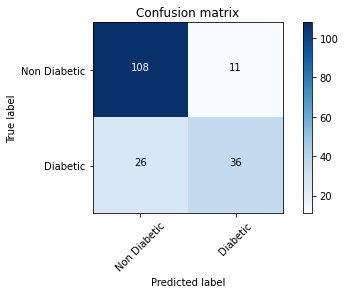

In [17]:
plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

In [59]:
# True Positives
TP = confusion[1, 1]
print(TP)

# True Negatives
TN = confusion[0, 0] 
print(TN)

# False Positives
FP = confusion[0, 1] 
print(FP)

# False Negatives
FN = confusion[1, 0] 
print(FN)

36
108
11
26


### 03. Metrics computed from the Confusion Matrix

In [19]:
from sklearn.metrics import recall_score, precision_score

#### Classification accuracy

In [20]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


#### Sensitivity/Recall

In [21]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


#### Specificity

In [22]:
print(TN / float(TN + FP))

0.907563025210084


#### False Positive Rate

In [26]:
print(FP / float(TN + FP))

0.09243697478991597


#### Precision

In [25]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


### Adjusting Classification Threshold

In [27]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [77]:
# print the first 10 predicted probabilities of class membership
#logreg.predict_proba(X_test)[0:10, :]
#logreg.predict_proba(X_test)[0:10, 1]
logreg.predict_proba(X_test)[0:10, 0]

array([0.80085377, 0.70450063, 0.81765257, 0.45582948, 0.32622925,
       0.79674719, 0.74752722, 0.64438483, 0.62830673, 0.69703945])

In [54]:
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.19914623, 0.29549937, 0.18234743, 0.54417052, 0.67377075,
       0.20325281, 0.25247278, 0.35561517, 0.37169327, 0.30296055,
       0.16669085, 0.41850214, 0.30877612, 0.10389585, 0.20290703,
       0.26936255, 0.46170705, 0.34179316, 0.16210376, 0.21874344,
       0.40230935, 0.15988596, 0.39404616, 0.20598894, 0.65190188,
       0.22479851, 0.38431086, 0.30742568, 0.30108719, 0.64808321,
       0.59854289, 0.2429454 , 0.16441841, 0.25453001, 0.18930141,
       0.44223239, 0.43385549, 0.38264081, 0.22298549, 0.29023489,
       0.4418927 , 0.24341196, 0.21232859, 0.48108705, 0.08501817,
       0.6382392 , 0.5997264 , 0.16403078, 0.31044002, 0.50162331,
       0.20503099, 0.24109771, 0.87318122, 0.1734658 , 0.18207412,
       0.16717741, 0.5982045 , 0.1887179 , 0.94110857, 0.51989603,
       0.4919069 , 0.5377017 , 0.71804099, 0.51598475, 0.47676375,
       0.22421376, 0.53995645, 0.12966959, 0.11849266, 0.28350987,
       0.64704309, 0.15681629, 0.11311328, 0.21661192, 0.49551

Text(0, 0.5, 'Frequency')

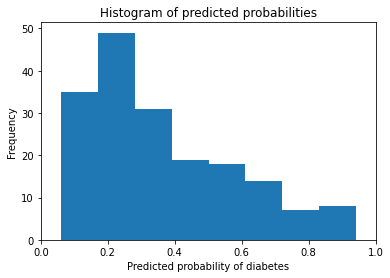

In [72]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [73]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

y_pred_class = binarize([y_pred_prob], 0.3)[0]
y_pred_class

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

In [74]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[108  11]
 [ 26  36]]


In [75]:
# new confusion matrix (threshold of 0.3)
confusion_new = confusion_matrix(y_test, y_pred_class)
print(confusion_new)

[[82 37]
 [ 8 54]]


In [35]:
# True Positives
TP = confusion_new[1, 1]

# True Negatives
TN = confusion_new[0, 0] 

# False Positives
FP = confusion_new[0, 1] 

# False Negatives
FN = confusion_new[1, 0] 

In [36]:
# sensitivity has increased
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred_class))

0.8709677419354839
0.8709677419354839


In [37]:
# specificity has decreased
print(TN / float(TN + FP))

0.6890756302521008


### 04. ROC Curves and Area Under the Curve (AUC)

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

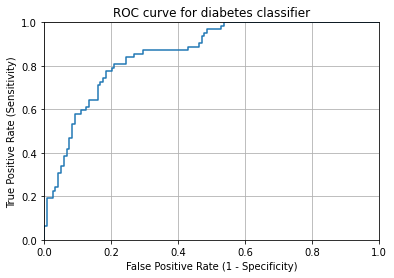

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [40]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [41]:
evaluate_threshold(0.3)

Sensitivity: 0.8709677419354839
Specificity: 0.7058823529411764


In [42]:
evaluate_threshold(0.5)

Sensitivity: 0.5806451612903226
Specificity: 0.907563025210084


In [43]:
print(roc_auc_score(y_test, y_pred_prob))

0.8587693141772839


In [44]:
# calculate cross-validated AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8374390514184398